In [56]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv('Iris.csv')
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


# EDA

In [5]:
df['Species'].nunique()

3

In [10]:
df.shape

(150, 6)

In [16]:
df['Id'].value_counts().sum()

150

<Axes: xlabel='Species', ylabel='count'>

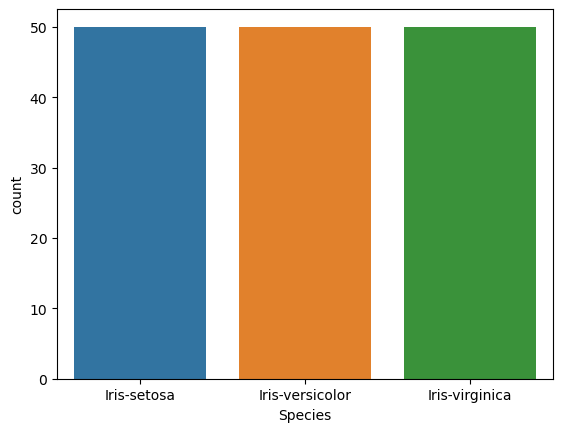

In [8]:
sns.countplot(data=df,x=df['Species'])

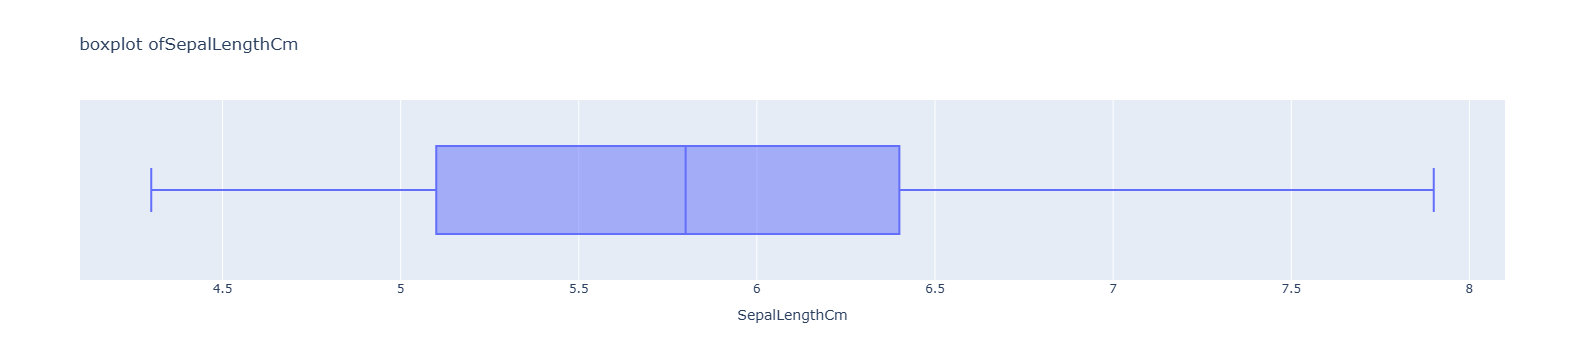

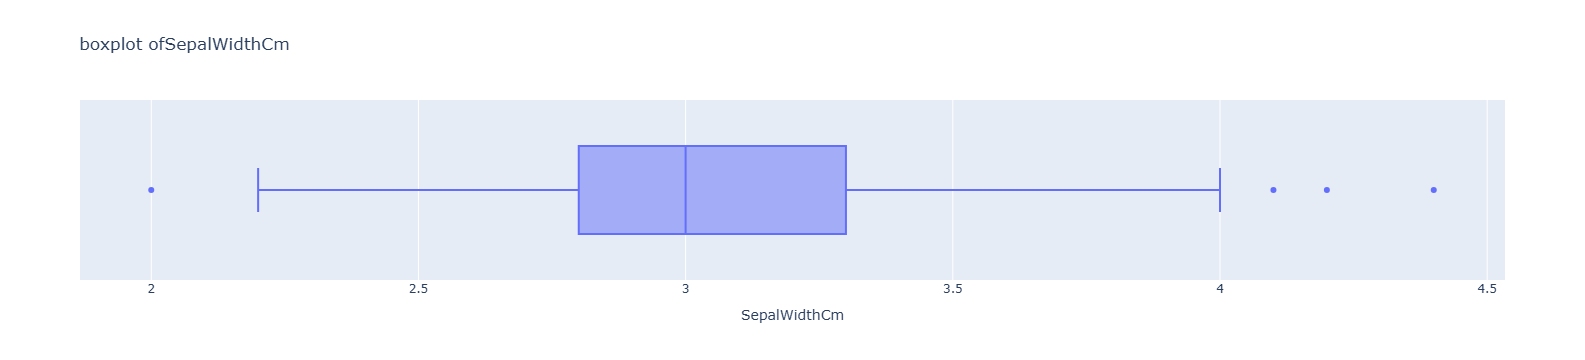

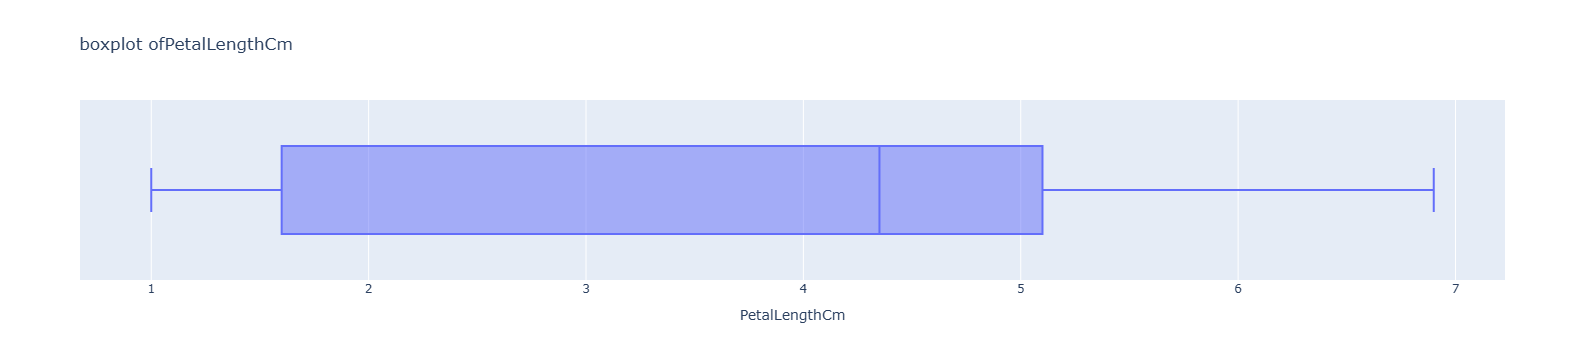

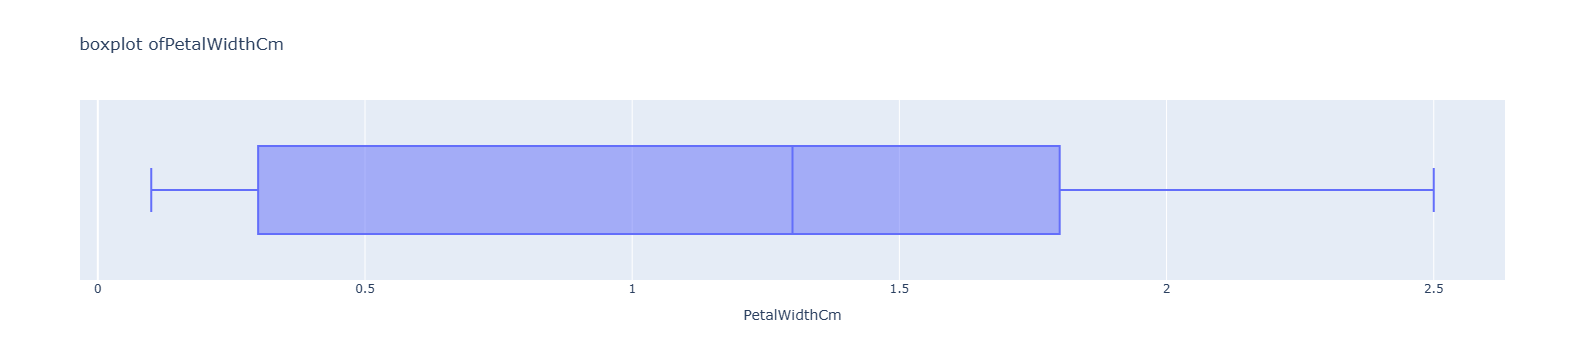

In [18]:
x=df.drop(columns=['Species','Id'])
for i in x.columns:
    fig=px.box(x,x=x[i],title=f'boxplot of{i}')
    fig.show()

# Data Precprocessing

In [20]:
le=LabelEncoder()

In [23]:
y=df['Species']
y=le.fit_transform(df['Species'])

In [24]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# LogisticRegression

In [27]:
x_train, x_test, y_train, y_test= train_test_split(x,y,stratify=y,train_size=0.7,random_state=42)

In [30]:
lo=LogisticRegression(max_iter=10000)

In [31]:
lo.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [35]:
y_lo_train_pred=lo.predict(x_train)

In [36]:
cm1=confusion_matrix(y_train,y_lo_train_pred)
cm1

array([[35,  0,  0],
       [ 0, 33,  2],
       [ 0,  1, 34]], dtype=int64)

In [38]:
print(classification_report(y_train,y_lo_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.97      0.94      0.96        35
           2       0.94      0.97      0.96        35

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105



In [39]:
y_lo_test_pred=lo.predict(x_test)

In [40]:
cm2=confusion_matrix(y_test,y_lo_test_pred)
cm2

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  2, 13]], dtype=int64)

In [41]:
print(classification_report(y_test,y_lo_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.93      0.90        15
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



# Feature scalling woth the logistic regression

In [43]:
fs=StandardScaler()

In [45]:
x_train_sc=fs.fit_transform(x_train)
x_test_sc=fs.fit_transform(x_test)

In [46]:
lo1=LogisticRegression(max_iter=10000)

In [48]:
lo1.fit(x_train_sc,y_train)

LogisticRegression(max_iter=10000)

In [51]:
y_lo_train_pred=lo.predict(x_train_sc)

In [52]:
cm3=confusion_matrix(y_train,y_lo_train_pred)
cm3

array([[35,  0,  0],
       [ 0, 34,  1],
       [ 0,  1, 34]], dtype=int64)

In [53]:
y_lo_test_pred=lo.predict(x_test_sc)

In [55]:
print(classification_report(y_test,y_lo_test_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.87        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



# KNN

In [57]:
knn=KNeighborsClassifier(n_neighbors=5)

In [58]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [59]:
y_pred_knn=knn.predict(x_test)

In [60]:
cm5=confusion_matrix(y_test,y_pred_knn)
cm5

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]], dtype=int64)

In [62]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

